In [63]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from pathlib import Path
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
def extract_scalars(run_path):
    result = defaultdict(list)
    p = Path("results/" + run_path)
    run = next(iter(p.glob("*")))
    event = EventAccumulator(str(run))
    event.Reload()
    for tag in event.Tags()['scalars']:
        for scalar in event.Scalars(tag):
            result[tag].append([scalar.step, scalar.value])
        result[tag] = pd.DataFrame(result[tag], columns=['step', 'value'])
    return result

def plot_test_acc(data, names):
    plt.figure(figsize=(7, 7))
    plt.grid()
    for i, run in enumerate(data):
        plt.plot(run['test/acc']['step'], run['test/acc']['value'], label=names[i])
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend()
    plt.show()

In [49]:
mixmatch4000_scalars = extract_scalars("mixmatch4000/07_45PM_December_17_2019")
baseline_scalars = extract_scalars("baseline/04_30PM_December_16_2019")

In [55]:
mixmatch4000_scalars['test/acc'].head()

,step,value
0,0,0.419486
1,1,0.640028
2,2,0.730693
3,3,0.772393
4,4,0.806827


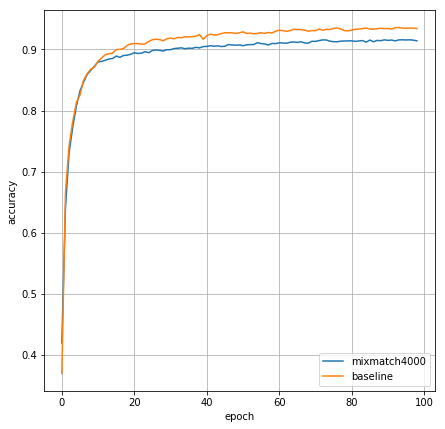

In [65]:
plot_test_acc([mixmatch4000_scalars, baseline_scalars], ['mixmatch4000', 'baseline'])